# Seaborn

In this notebook we are going to explore some of the functionalities of the plotting package named **seaborn**

## Introduction

As usual, let's upload the packages that we need to run the exercise

In [1]:
import pandas as pd
import seaborn as sns

The first step is to upload the data which consist of credit information for a cross section of 400 individuals. 

In [2]:
df = pd.read_csv('Credit.csv')
df.set_index('Id', inplace = True)
df.head(10) # this is to see the first 10 rows of the dataframe

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
Id,,,,,,,,,,,
1,14.891,3606,283,2,34,11,No,No,Yes,South,333
2,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
3,104.593,7075,514,4,71,11,No,No,No,West,580
4,148.924,9504,681,3,36,11,Yes,No,No,West,964
5,55.882,4897,357,2,68,16,No,No,Yes,South,331
6,80.180,8047,569,4,77,10,No,No,No,South,1151
7,20.996,3388,259,2,37,12,Yes,No,No,East,203
8,71.408,7114,512,2,87,9,No,No,No,West,872
9,15.125,3300,266,5,66,13,Yes,No,No,South,279


Let us plot the histogram for the variable **age**. In addition to the histogram we might want to report also the kernel density of the data using the option *kde=True*. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

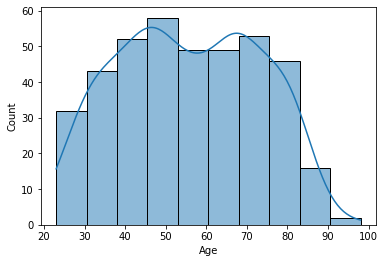

In [3]:
sns.histplot(df.Age, kde=True)

Seaborn package allows for a great level of flexibility when it comes to data visualization. For instance, we can report the histogram of a given variable conditional on several qualitative characteristics. For instance, suppose we want to plot the histogram of **income** based on **region** and **married**

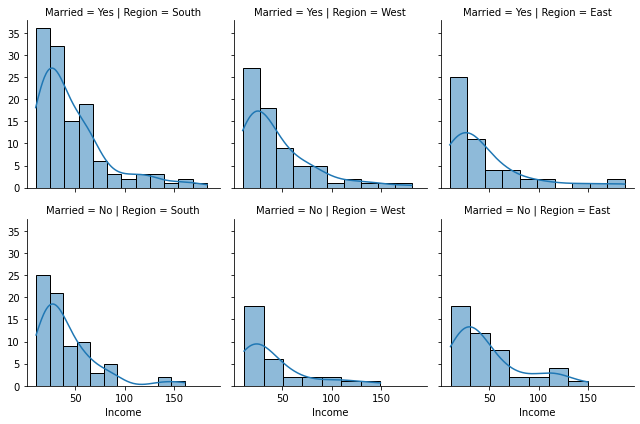

In [4]:
g = sns.FacetGrid(df, row='Married', col='Region')
g.map(sns.histplot, "Income", kde = True)

By using the command **jointplot** we can combine the scatter plot and the histogram of two variables. 

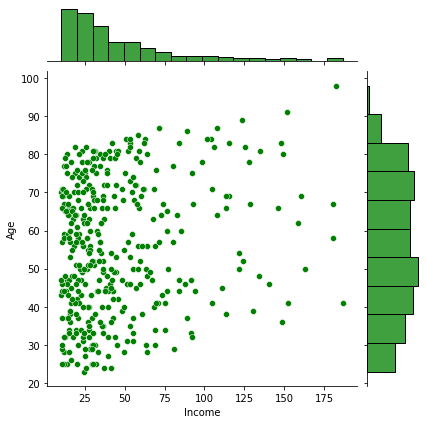

In [5]:
sns.jointplot(data=df, x='Income', y='Age', color='g')

We could also look at the linear regression estimate (meaning the fitted value of the regression) by using the option *kind='reg'*. 

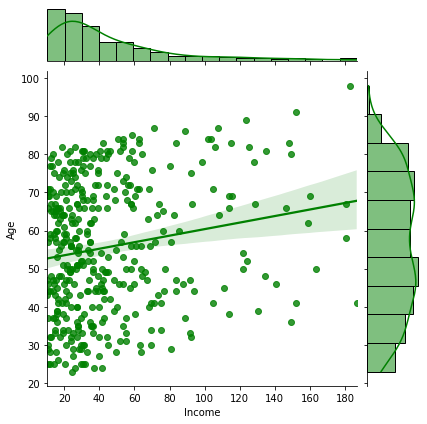

In [13]:
sns.jointplot(data=df, x='Income', y='Age', kind='reg', color='g')
# kind='reg' for regression line
# can also use 'resid' for residual; 'kde' for kernel density esimation

The regression line suggests there is a positive correlation between **income** and **age**.

A more detailed picture of the cross-sectional correlation of the variables can be implemented using the *heatmap* function of **seaborn**. 

<AxesSubplot:>

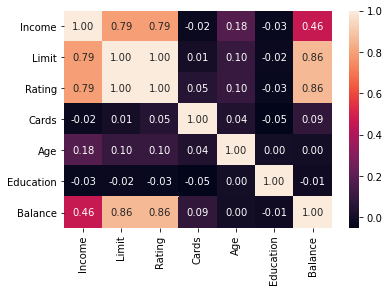

In [15]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")
# annot=True is optional, writing data value in each cell

Interestingly, there is perfect correlation between **rating** and **limit** so we may do not want to consider both in a linear regression model. 